<a href="https://colab.research.google.com/github/ShaileshaPMaganahalli/CPME_258_Deep_Learning/blob/master/homework_2/Graded_Assignment_1_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Shailesha - Graded Assignment 1 : Do MNIST classifier using numpy and python without CNN and just using plain neural networks.**

In [1]:
from keras import datasets
import reprlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import pyplot

import tensorflow as tf
from tqdm import trange
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
def load_dataset():

  (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

  images,labels =(X_train[0:1000].reshape(1000,28*28)/255,y_train[0:1000]) # Normalising the Train data with 255
  one_hot_labels =np.zeros((len(labels),10))
  for i,l in enumerate(labels):
    one_hot_labels[i][l]=l
  labels=one_hot_labels
  test_images =X_test.reshape(len(X_test),28*28)/255 #  Normalising the Test data with 255
  test_labels =np.zeros((len(y_test),10))
  for i,l in enumerate(y_test):
    test_labels[i][l]=l
  return X_train,y_train,X_test,y_test,images,labels,test_images,test_labels

11493376/11490434 [==============================] - 0s 0us/step
Train X shape... (60000, 28, 28)
Train y shape... (60000,)
Test X shape... (10000, 28, 28)
Test y shape... (10000,)


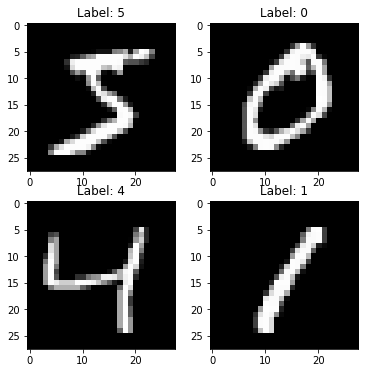

In [3]:
X_train,y_train,X_test,y_test,images,labels,test_images,test_labels=load_dataset()
plt.figure(figsize=[6,6])
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.title("Label: %i"%y_train[i])
  plt.imshow(X_train[i].reshape([28,28]),cmap='gray')
print('Train X shape...', X_train.shape)
print('Train y shape...', y_train.shape)
print('Test X shape...', X_test.shape)
print('Test y shape...', y_test.shape)

In [0]:

def Relu(x):
  return (x>0)*x

In [0]:
def DeriveRelu(output):
  return output >=0

In [0]:
alpha=0.001
iterations=300
hidden_size=120
pixel_per_image=784
num_labels=10

In [0]:
weights_0_1=0.2*np.random.random((pixel_per_image,hidden_size))-0.1
weights_1_2=0.2*np.random.random((hidden_size,num_labels))-0.1

In [8]:
for j in range(iterations):
  error,correct_cnt =(0.0,0)
  for i in range(len(images)):
    layer_0=images[i:i+1]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error +=np.sum((labels[i:i+1]-layer_2)**2)
    correct_cnt +=int(np.argmax(layer_2)==np.argmax(labels[i:i+1]))
    layer_2_delta=(labels[i:i+1]-layer_2)
    layer_1_delta=layer_2_delta.dot(weights_1_2.T)*DeriveRelu(layer_1)
    weights_1_2 +=alpha*layer_1.T.dot(layer_2_delta)
    weights_0_1+=alpha*layer_0.T.dot(layer_1_delta)
  print('Train error- '+str(error/float(len(images)))[0:5]+' '+' Train accuracy- '+str(correct_cnt/float(len(images))))

Train error- 20.25  Train accuracy- 0.339
Train error- 13.99  Train accuracy- 0.483
Train error- 11.92  Train accuracy- 0.554
Train error- 10.78  Train accuracy- 0.593
Train error- 10.00  Train accuracy- 0.627
Train error- 9.420  Train accuracy- 0.656
Train error- 8.958  Train accuracy- 0.671
Train error- 8.580  Train accuracy- 0.682
Train error- 8.260  Train accuracy- 0.695
Train error- 7.984  Train accuracy- 0.705
Train error- 7.741  Train accuracy- 0.713
Train error- 7.527  Train accuracy- 0.723
Train error- 7.334  Train accuracy- 0.727
Train error- 7.161  Train accuracy- 0.735
Train error- 7.005  Train accuracy- 0.742
Train error- 6.861  Train accuracy- 0.746
Train error- 6.728  Train accuracy- 0.749
Train error- 6.606  Train accuracy- 0.754
Train error- 6.494  Train accuracy- 0.758
Train error- 6.389  Train accuracy- 0.759
Train error- 6.291  Train accuracy- 0.766
Train error- 6.196  Train accuracy- 0.77
Train error- 6.107  Train accuracy- 0.774
Train error- 6.023  Train accuracy-

In [9]:
if (j%10==0 or j == iterations-1):
  error,correct_cnt =(0.0,0)
  for i in range(len(test_images)):
    layer_0=test_images[i:i+1]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error+=np.sum((test_labels[i:i+1]-layer_2) **2)
    correct_cnt+=int(np.argmax(layer_2)==np.argmax(test_labels[i:i+1]))
    print(reprlib.repr('Test error- '+str(error/float(len(test_images)))[0:5]+' '+"Test accuracy- "+str(correct_cnt/float(len(test_images)))))

Streaming output truncated to the last 5000 lines.
'Test error- ...uracy- 0.2169'
'Test error- ...curacy- 0.217'
'Test error- ...uracy- 0.2171'
'Test error- ...uracy- 0.2172'
'Test error- ...uracy- 0.2172'
'Test error- ...uracy- 0.2172'
'Test error- ...uracy- 0.2173'
'Test error- ...uracy- 0.2173'
'Test error- ...uracy- 0.2174'
'Test error- ...uracy- 0.2175'
'Test error- ...uracy- 0.2176'
'Test error- ...uracy- 0.2177'
'Test error- ...uracy- 0.2177'
'Test error- ...uracy- 0.2177'
'Test error- ...uracy- 0.2177'
'Test error- ...uracy- 0.2178'
'Test error- ...uracy- 0.2179'
'Test error- ...curacy- 0.218'
'Test error- ...curacy- 0.218'
'Test error- ...uracy- 0.2181'
'Test error- ...uracy- 0.2182'
'Test error- ...uracy- 0.2183'
'Test error- ...uracy- 0.2184'
'Test error- ...uracy- 0.2185'
'Test error- ...uracy- 0.2186'
'Test error- ...uracy- 0.2187'
'Test error- ...uracy- 0.2188'
'Test error- ...uracy- 0.2188'
'Test error- ...uracy- 0.2189'
'Test error- ...curacy- 0.219'
'Test error- ...cur

**Code With Dropout**

In [10]:
for j in range(iterations):
  error,correct_cnt =(0.0,0)
  for i in range(len(images)):
    layer_0=images[i:i+1]
    dropout_mask=np.random.randint(8,size=layer_1.shape)
    layer_1*=dropout_mask*8
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error +=np.sum((labels[i:i+1]-layer_2)**2)
    correct_cnt +=int(np.argmax(layer_2)==np.argmax(labels[i:i+1]))
    layer_2_delta=(labels[i:i+1]-layer_2)
    layer_1_delta=layer_2_delta.dot(weights_1_2.T)*DeriveRelu(layer_1)

    layer_1_delta*=dropout_mask
    weights_1_2 +=alpha*layer_1.T.dot(layer_2_delta)
    weights_0_1+=alpha*layer_0.T.dot(layer_1_delta)
  print('Train error- '+str(error/float(len(images)))[0:5]+' '+' Train accuracy- '+str(correct_cnt/float(len(images))))

Train error- 127.3  Train accuracy- 0.417
Train error- 19.94  Train accuracy- 0.562
Train error- 13.78  Train accuracy- 0.609
Train error- 13.00  Train accuracy- 0.617
Train error- 10.25  Train accuracy- 0.702
Train error- 9.746  Train accuracy- 0.683
Train error- 9.088  Train accuracy- 0.687
Train error- 8.727  Train accuracy- 0.714
Train error- 8.518  Train accuracy- 0.729
Train error- 8.380  Train accuracy- 0.742
Train error- 8.595  Train accuracy- 0.739
Train error- 8.521  Train accuracy- 0.733
Train error- 8.158  Train accuracy- 0.727
Train error- 8.110  Train accuracy- 0.727
Train error- 7.866  Train accuracy- 0.725
Train error- 7.341  Train accuracy- 0.725
Train error- 7.226  Train accuracy- 0.728
Train error- 6.967  Train accuracy- 0.739
Train error- 7.001  Train accuracy- 0.745
Train error- 6.972  Train accuracy- 0.743
Train error- 7.401  Train accuracy- 0.751
Train error- 6.842  Train accuracy- 0.768
Train error- 7.075  Train accuracy- 0.753
Train error- 7.271  Train accuracy

In [11]:
if (j%10==0 or j == iterations-1):
  error,correct_cnt =(0.0,0)
  for i in range(len(test_images)):
    layer_0=test_images[i:i+1]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error+=np.sum((test_labels[i:i+1]-layer_2) **2)
    correct_cnt+=int(np.argmax(layer_2)==np.argmax(test_labels[i:i+1]))
    print('Test error- '+str(error/float(len(test_images)))[0:5]+' '+"Test accuracy- "+str(correct_cnt/float(len(test_images))))

Streaming output truncated to the last 5000 lines.
Test error- 8.811 Test accuracy- 0.2727
Test error- 8.812 Test accuracy- 0.2728
Test error- 8.812 Test accuracy- 0.2729
Test error- 8.813 Test accuracy- 0.273
Test error- 8.813 Test accuracy- 0.2731
Test error- 8.813 Test accuracy- 0.2731
Test error- 8.819 Test accuracy- 0.2732
Test error- 8.819 Test accuracy- 0.2733
Test error- 8.826 Test accuracy- 0.2733
Test error- 8.827 Test accuracy- 0.2734
Test error- 8.828 Test accuracy- 0.2735
Test error- 8.829 Test accuracy- 0.2736
Test error- 8.829 Test accuracy- 0.2736
Test error- 8.830 Test accuracy- 0.2736
Test error- 8.841 Test accuracy- 0.2736
Test error- 8.843 Test accuracy- 0.2737
Test error- 8.847 Test accuracy- 0.2738
Test error- 8.848 Test accuracy- 0.2739
Test error- 8.850 Test accuracy- 0.2739
Test error- 8.851 Test accuracy- 0.274
Test error- 8.852 Test accuracy- 0.2741
Test error- 8.852 Test accuracy- 0.2742
Test error- 8.853 Test accuracy- 0.2743
Test error- 8.854 Test accuracy

**Mini-Batch Gradient Descent**

In [12]:
batch_size=1000
alpha=0.5
for j in range(iterations):
  error,correct_cnt=(0.0,0)
  for i in range(int(len(images)/ batch_size)):
    batch_start, batch_end =((i*batch_size),((i+1)*batch_size))
    #print(batch_start,batch_end)
    layer_0=images[batch_start:batch_end]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error +=np.sum((labels[batch_start:batch_end]-layer_2)**2)
    for k in range(batch_size):
      correct_cnt +=int(np.argmax(layer_2[k:k+1])==np.argmax(labels[batch_start:batch_end]))
      layer_2_delta=(labels[batch_start:batch_end]-layer_2)
      layer_1_delta=layer_2_delta.dot(weights_1_2.T)*DeriveRelu(layer_1)
      weights_1_2 +=alpha*layer_1.T.dot(layer_2_delta)
      weights_0_1+=alpha*layer_0.T.dot(layer_1_delta)
  print('Train error- '+str(error/float(len(images)))[0:5]+' '+' Train accuracy- '+str(correct_cnt/float(len(images))))

Train error- 4.487  Train accuracy- 0.0
Train error- 6.113  Train accuracy- 0.0
Train error- 1.513  Train accuracy- 0.0
Train error- inf  Train accuracy- 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error-

In [13]:
if (j%10==0 or j == iterations-1):
  error,correct_cnt =(0.0,0)
  for i in range(len(test_images)):
    layer_0=test_images[i:i+1]
    layer_1=relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error+=np.sum((test_labels[i:i+1]-layer_2) **2)
    correct_cnt+=int(np.argmax(layer_2)==np.argmax(test_labels[i:i+1]))
    print('Test error- '+str(error/float(len(test_images)))[0:5]+' '+"Test accuracy- "+str(correct_cnt/float(len(test_images))))

NameError: ignored

**Data Argumentation**

**Feature standardisation**

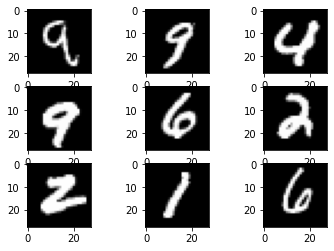

In [14]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
datagenarat = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagenarat.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagenarat.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


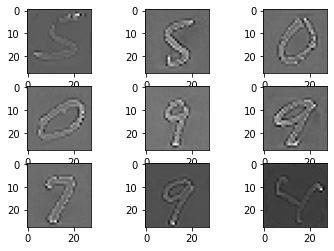

In [15]:
datagenarat = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagenarat.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagenarat.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [16]:
for j in range(iterations):
  error,correct_cnt =(0.0,0)
  for i in range(len(images)):
    layer_0=images[i:i+1]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error +=np.sum((labels[i:i+1]-layer_2)**2)
    correct_cnt +=int(np.argmax(layer_2)==np.argmax(labels[i:i+1]))
    layer_2_delta=(labels[i:i+1]-layer_2)
    layer_1_delta=layer_2_delta.dot(weights_1_2.T)*DeriveRelu(layer_1)
    weights_1_2 +=alpha*layer_1.T.dot(layer_2_delta)
    weights_0_1+=alpha*layer_0.T.dot(layer_1_delta)
  print('Train error- '+str(error/float(len(images)))[0:5]+' '+' Train accuracy- '+str(correct_cnt/float(len(images))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
